<a href="https://colab.research.google.com/github/Poorya0071/Regression-machine-learning-and-deep-learning/blob/master/Insurance_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Models for the Insurance Dataset 

### In this project, we will solve the regression problem, predict the charge value once with RandomForrest Regressor and once with Deep Neural Network, and compare the results.

In [169]:
#import libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

# upload the dataset

In [2]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [3]:
insurance.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### we do not hany any missing data

In [170]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [171]:
X = insurance.drop(['charges'], axis = 1)
y = insurance['charges']

# Let's use get dummies method to convert text categotical data to numbers

In [172]:
X = pd.get_dummies(X)
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


# Split the dataset

In [174]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state= 42)

# Dense model

In [175]:
from tensorflow.keras import layers

model = tf.keras.Sequential([
    layers.Dense(32, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(256, activation = 'relu')
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['mae'])

In [176]:
model_history = model.fit(X_train, y_train, epochs = 500, verbose = 0,
                          validation_data = (X_test, y_test))

In [177]:
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 4598.8130 - mae: 4598.8130


[4598.81298828125, 4598.81298828125]

In [180]:
model_1_dataframe = pd.DataFrame(model_history.history)

In [181]:
model_1_dataframe.head()

,loss,mae,val_loss,val_mae
0,13333.243164,13333.243164,12919.628906,12919.629883
1,13130.628906,13130.628906,12388.779297,12388.779297
2,11813.333984,11813.333984,10087.696289,10087.696289
3,9632.092773,9632.092773,9485.872070,9485.872070
4,9407.374023,9407.374023,9344.208984,9344.208984


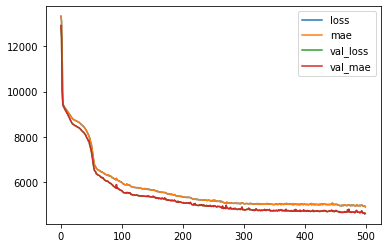

In [184]:
model_1_dataframe.plot()

# Scaling

### let's convert the data to numbers in the other way to be abale to scale the dataset at the same time

In [185]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [186]:
# make column_transformer and apply MinMaxScaler and OneHotEncoder.
ct = make_column_transformer(
                              (MinMaxScaler(), ['age', 'bmi', 'children']),
                              (OneHotEncoder(handle_unknown= 'ignore'),['sex', 'smoker', 'region'])
                              )

X = insurance.drop(['charges'], axis = 1)
y = insurance['charges']
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state= 42)

# fit column_transformer to the train data
ct.fit(X_train)

X_train_scaled = ct.transform(X_train)
X_test_scaled = ct.transform(X_test)

# Dense Model

In [187]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    layers.Dense(16, activation = 'relu'),
    layers.Dense(32, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(128, activation = 'relu')
])

model_1.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
              metrics = ['mae'])

In [188]:
model_1_history = model_1.fit(X_train_scaled, y_train, epochs = 500, verbose = 0,
                          validation_data = (X_test_scaled, y_test))

In [190]:
model_1.evaluate(X_test_scaled, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 2794.7168 - mae: 2794.7168


[2794.716796875, 2794.716796875]

In [191]:
model_2_dataframe = pd.DataFrame(model_1_history.history)

In [192]:
model_2_dataframe.head()

,loss,mae,val_loss,val_mae
0,13345.781250,13345.781250,12967.290039,12967.290039
1,13342.024414,13342.024414,12957.515625,12957.515625
2,13315.046875,13315.046875,12899.189453,12899.189453
3,13190.732422,13190.732422,12671.219727,12671.219727
4,12791.557617,12791.557617,12027.116211,12027.116211


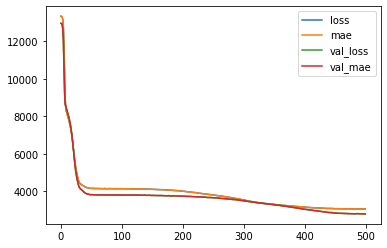

In [193]:
model_2_dataframe.plot()

# RandomForestRegressor Model

In [194]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(X_train_scaled, y_train)

RandomForestRegressor()

# make prediction on test datasets

In [195]:
y_pred_rfr = reg.predict(X_test_scaled)

In [196]:
y_pred = model_1.predict(X_test_scaled)

9/9 [==============================] - 0s 3ms/step


In [198]:
y_pred[1]

array([   0.    , 5242.2974, 5242.575 ,    0.    , 5241.6694, 5241.7544,
       5242.4585,    0.    , 5242.24  , 5242.645 , 5241.972 , 5241.797 ,
       5242.6865,    0.    , 5242.466 ,    0.    , 5242.5474, 5242.4873,
       5242.5483, 5242.3203, 5242.6   , 5241.5596, 5242.4116, 5242.5107,
       5241.687 , 5242.659 , 5242.3237, 5242.322 , 5242.39  , 5242.8213,
       5242.405 , 5242.669 , 5242.41  , 5242.428 , 5242.45  , 5242.284 ,
       5241.7725, 5242.293 , 5242.144 , 5242.9766, 5241.802 , 5242.5166,
          0.    , 5242.308 , 5242.256 , 5242.354 , 5242.408 , 5242.314 ,
       5242.5464, 5242.4585, 5242.939 ,    0.    , 5241.487 , 5242.563 ,
       5242.311 , 5242.2285, 5242.6626, 5242.396 , 5241.802 , 5241.8604,
       5242.694 , 5242.4966, 5242.554 , 5242.264 , 5242.5415, 5241.8994,
       5242.681 , 5242.422 , 5242.2954, 5242.519 , 5242.757 , 5241.964 ,
       5242.3027, 5242.299 , 5242.6514, 5242.501 , 5242.7114, 5242.624 ,
       5242.4546, 5242.3687, 5242.3394, 5242.121 , 

### As y_pred is not just a number, we create a function to select the maximum of those values and save in a list.

In [199]:
import numpy as np
y_pred_ls = []
for i in range(len(y_test)):
  pred = np.max(y_pred[i])
  y_pred_ls.append(pred)


In [201]:
y_pred_ls[1]

5243.0366

In [202]:
y_test

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
109     47055.53210
575     12222.89830
535      6067.12675
543     63770.42801
846      9872.70100
Name: charges, Length: 268, dtype: float64

# we need to reset the indexes of test data

In [208]:
y_test = y_test.reset_index()
y_test.head()

,index,charges
0,764,9095.06825
1,887,5272.17580
2,890,29330.98315
3,1293,9301.89355
4,259,33750.29180


In [209]:
results = pd.DataFrame()
results['Real Charge'] = y_test['charges']
results['Prediction DNN'] = y_pred_ls
results['Prediction RFR'] = y_pred_rfr


# Let's define two functions to find the percentage of accurace for each model and add to the dataframe.

In [210]:
dnn_acc = []
for i in range(len(results['Prediction DNN'])):
  acc = 100 - (np.abs(results['Real Charge'][i] - results['Prediction DNN'][i])/results['Real Charge'][i]) * 100
  dnn_acc.append(acc)

In [211]:
RFR_acc = []
for i in range(len(results['Prediction DNN'])):
  acc = 100 - (np.abs(results['Real Charge'][i] - results['Prediction RFR'][i])/results['Real Charge'][i]) * 100
  RFR_acc.append(acc)

In [212]:
results['DNN accuracy'] = dnn_acc
results['RFR accuracy'] = RFR_acc

In [213]:
results.head(35)

,Real Charge,Prediction DNN,Prediction RFR,DNN accuracy,RFR accuracy
0,9095.06825,9151.562500,9730.814506,99.378847,93.009989
1,5272.17580,5243.036621,5209.045739,99.447303,98.802581
2,29330.98315,29914.460938,28274.247233,98.010712,96.397203
3,9301.89355,9325.814453,10027.145344,99.742838,92.203181
4,33750.29180,26187.900391,34688.491578,77.593108,97.220173
5,4536.25900,4495.821777,9162.531677,99.108578,-1.984315
6,2117.33885,2080.293457,2096.111420,98.250380,98.997448
7,14210.53595,14158.611328,14567.011929,99.634605,97.491467
8,3732.62510,3763.756104,5796.017897,99.165976,44.720063
9,10264.44210,10318.059570,11419.813235,99.477639,88.743946


# Conclusion
By comparing these two models, we can conclude that, in most cases, the DNN model works highly better.